In [43]:
import pandas as pd

data = pd.read_csv('https://raw.githubusercontent.com/AUP-CS2091/Week-8/master/churn_train.csv')
tdata = pd.read_csv('https://raw.githubusercontent.com/AUP-CS2091/Week-8/master/churn_test.csv')

data = data[:5000]
data.head()

,COLLEGE,INCOME,OVERAGE,LEFTOVER,HOUSE,HANDSET_PRICE,OVER_15MINS_CALLS_PER_MONTH,AVERAGE_CALL_DURATION,REPORTED_SATISFACTION,REPORTED_USAGE_LEVEL,CONSIDERING_CHANGE_OF_PLAN,LEAVE
0,zero,31953,0,6,313378,161,0,4,unsat,little,no,STAY
1,one,36147,0,13,800586,244,0,6,unsat,little,considering,STAY
2,one,27273,230,0,305049,201,16,15,unsat,very_little,perhaps,STAY
3,zero,120070,38,33,788235,780,3,2,unsat,very_high,considering,LEAVE
4,one,29215,208,85,224784,241,21,1,very_unsat,little,never_thought,STAY


* COLLEGE : Is the customer college educated?
* INCOME	: Annual income
* OVERAGE	: Average overcharges per month
* LEFTOVER : Average % leftover minutes per month
* HOUSE : Value of dwelling (from census tract)
* HANDSET_PRICE : Cost of phone
* OVER_15MINS_CALLS_PER_MONTH : Average number of long (>15 mins) calls per month
* AVERAGE_CALL_DURATION : Average call duration
* REPORTED_SATISFACTION : Reported level of satisfaction
* REPORTED_USAGE_LEVEL : Self-reported usage level
* CONSIDERING_CHANGE_OF_PLAN : Was customer considering changing his/her plan?
* LEAVE : Class variable: whether customer left or stayed

In [44]:
data['COLLEGE'] = data['COLLEGE'].astype('category').cat.codes
data['REPORTED_SATISFACTION'] = data['REPORTED_SATISFACTION'].astype('category').cat.codes
data['REPORTED_USAGE_LEVEL'] = data['REPORTED_USAGE_LEVEL'].astype('category').cat.codes
data['CONSIDERING_CHANGE_OF_PLAN'] = data['CONSIDERING_CHANGE_OF_PLAN'].astype('category').cat.codes
data['LEAVE'] = data['LEAVE'].astype('category').cat.codes

tdata['COLLEGE'] = tdata['COLLEGE'].astype('category').cat.codes
tdata['REPORTED_SATISFACTION'] = tdata['REPORTED_SATISFACTION'].astype('category').cat.codes
tdata['REPORTED_USAGE_LEVEL'] = tdata['REPORTED_USAGE_LEVEL'].astype('category').cat.codes
tdata['CONSIDERING_CHANGE_OF_PLAN'] = tdata['CONSIDERING_CHANGE_OF_PLAN'].astype('category').cat.codes

from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

X = data.loc[:, data.columns != 'LEAVE']
y = data['LEAVE']

X_pred = tdata

model = DecisionTreeClassifier(max_depth=10)
model.fit(X,y)
probs = model.predict_proba(X_pred)

tdata['PLEAVE'] = probs[:,0]
tdata.head()

,COLLEGE,INCOME,OVERAGE,LEFTOVER,HOUSE,HANDSET_PRICE,OVER_15MINS_CALLS_PER_MONTH,AVERAGE_CALL_DURATION,REPORTED_SATISFACTION,REPORTED_USAGE_LEVEL,CONSIDERING_CHANGE_OF_PLAN,PLEAVE
0,0,41697,151,36,496971,445,25,2,4,2,1,0.846667
1,0,83444,66,0,905435,255,3,14,2,2,1,0.194313
2,1,28096,64,35,165131,247,3,1,2,3,0,0.470588
3,0,32740,0,0,175285,206,0,14,2,4,0,0.080000
4,0,81630,0,20,469753,329,1,4,4,2,0,0.082927


In [45]:
import numpy as np
rng = np.arange(1,40,5)
rng

array([ 1,  6, 11, 16, 21, 26, 31, 36])

In [46]:
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
acc = []
X = data.loc[:, data.columns != 'LEAVE']
y = data.loc[:, 'LEAVE']
for s in rng:
    model = DecisionTreeClassifier(max_depth=s)
    model.fit(X,y)
    acc.append(accuracy_score(y,model.predict(X)))

acc

[0.61739999999999995,
 0.73480000000000001,
 0.86180000000000001,
 0.96379999999999999,
 0.996,
 1.0,
 1.0,
 1.0]

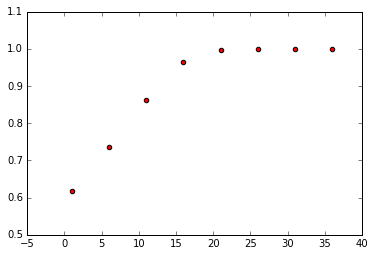

In [47]:
import matplotlib.pylab as plt
%matplotlib inline
plt.scatter(rng, acc, c='red')

In [48]:
X = data.loc[:, data.columns != 'LEAVE']
y = data.loc[:, 'LEAVE']
from sklearn import model_selection
X_train,X_test,y_train,y_test = \
    model_selection.train_test_split(X,y,train_size=0.8)

In [49]:
err = []
xt = X_train
yt = y_train
for s in rng:
    model = DecisionTreeClassifier(max_depth=s)
    model.fit(xt,yt)
    err.append(accuracy_score(yt,model.predict(xt)))
err

[0.61724999999999997,
 0.73599999999999999,
 0.87975000000000003,
 0.97550000000000003,
 0.99775000000000003,
 1.0,
 1.0,
 1.0]

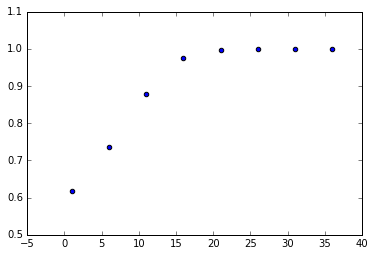

In [50]:
import matplotlib.pylab as plt
%matplotlib inline
plt.scatter(rng, err, c='blue')

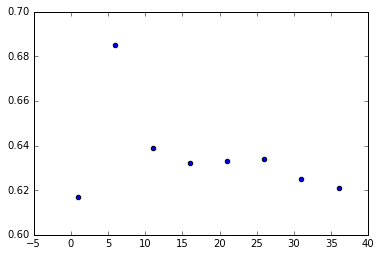

In [51]:
rng = np.arange(1, 40, 5)
acc2 = []
for s in rng:
    model = DecisionTreeClassifier(max_depth=s)
    model.fit(X_train,y_train)
    acc2.append(accuracy_score(y_test, model.predict(X_test)))
    
import matplotlib.pylab as plt
%matplotlib inline
plt.scatter(rng, acc2, c='blue')

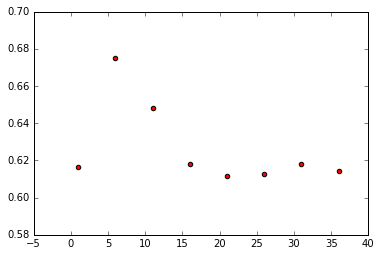

In [52]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
model = DecisionTreeClassifier(max_depth=10)
scores = cross_val_score(model, X,y,cv=5)
mean = scores.mean()
rng = np.arange(1,40,5)
scor=[]
for s in rng:
    model = DecisionTreeClassifier(max_depth=s)
    model.fit(X,y)
    scor.append(cross_val_score(model,X,y,cv=5).mean())
    
import matplotlib.pylab as plt
%matplotlib inline
plt.scatter(rng, scor, c='red')

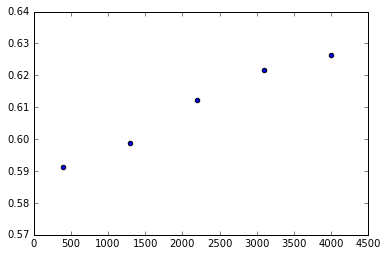

In [53]:
model = DecisionTreeClassifier(max_depth=5)
from sklearn.model_selection import learning_curve
train_sizes1 = train_sizes
train_sizes1, train_scores, test_scores1 = learning_curve(model,X,y,cv=5)
mean_values1 = np.mean(test_scores, axis=1)

plt.scatter(train_sizes1,mean_values1)

AttributeError: Unknown property cv

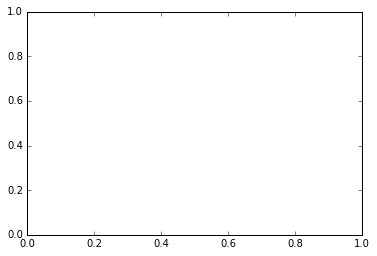

In [54]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
train_sizes2 = train_sizes
train_sizes2, train_scores, test_scores2 = learning_curve(model,X,y,cv=5)
mean_values2 = np.mean(test_scores,axis=1)
plt.scatter(train_sizes1,mean_values1,cv='red')
plt.scatter(train_sizes2,mean_values2,cv='blue')

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=s)
train_sizes, train_scores, test_scores = learning_curve(model,X,y,cv=5)
mean_values = np.mean(test_scores,axis=1)
plt.scatter(train_sizes,mean_values)

In [ ]:
rng = np.arange(22, 27, 1)
from sklearn.neighbors import KNeighborsClassifier
acc3 = []
for s in rng:
    model = KNeighborsClassifier(n_neighbors=s)
    model.fit(X_train,y_train)
    acc3.append(accuracy_score(y_test, model.predict(X_test)))
    
import matplotlib.pylab as plt
%matplotlib inline
plt.scatter(rng, acc3, c='blue')

In [ ]:
rng = np.arange(1,100,2)
from sklearn.neighbors import KNeighborsClassifier
scor=[]
for s in rng:
    model = KNeighborsClassifier(n_neighbors=s)
    model.fit(X,y)
    scor.append(cross_val_score(model,X,y,cv=5).mean())
import matplotlib.pylab as plt
%matplotlib inline
plt.scatter(rng, scor, c='red')

In [ ]:
from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering(n_clusters=2)
clusters = clusters.fit_predict(data)

## Assignment 7
<b>Question 1<b>

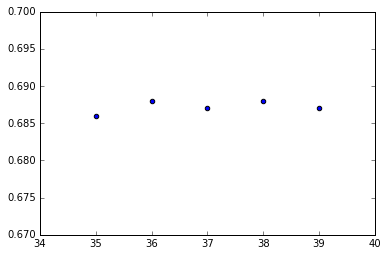

In [55]:
rng = np.arange(35, 40, 1)
from sklearn.tree import DecisionTreeClassifier
acc4 = []
for s in rng:
    model = DecisionTreeClassifier(min_samples_leaf=s)
    model.fit(X_train,y_train)
    acc4.append(accuracy_score(y_test, model.predict(X_test)))
    
import matplotlib.pylab as plt
%matplotlib inline
plt.scatter(rng, acc4, c='blue')

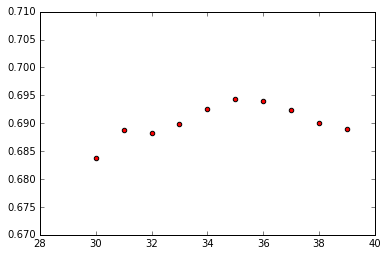

In [56]:
scores = cross_val_score(model, X,y,cv=5)
mean = scores.mean()
rng = np.arange(30,40,1)
scor1=[]
for s in rng:
    model = DecisionTreeClassifier(min_samples_leaf=s)
    model.fit(X,y)
    scor1.append(cross_val_score(model,X,y,cv=5).mean())
import matplotlib.pylab as plt
%matplotlib inline
plt.scatter(rng, scor1, c='red')

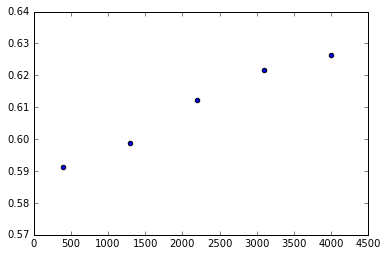

In [57]:
model = DecisionTreeClassifier(min_samples_leaf=36)
from sklearn.model_selection import learning_curve
train_sizes1 = train_sizes
train_sizes1, train_scores, test_scores1 = learning_curve(model,X,y,cv=5)
mean_values1 = np.mean(test_scores, axis=1)

plt.scatter(train_sizes1,mean_values1)

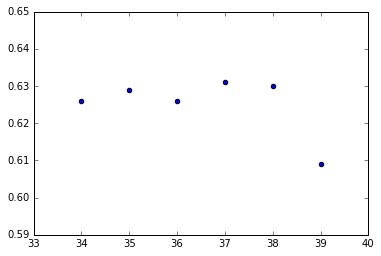

In [58]:
rng = np.arange(34, 40, 1)
from sklearn.tree import DecisionTreeClassifier
acc5 = []
for s in rng:
    model = DecisionTreeClassifier(random_state=s)
    model.fit(X_train,y_train)
    acc5.append(accuracy_score(y_test, model.predict(X_test)))
    
import matplotlib.pylab as plt
%matplotlib inline
plt.scatter(rng, acc5, c='blue')


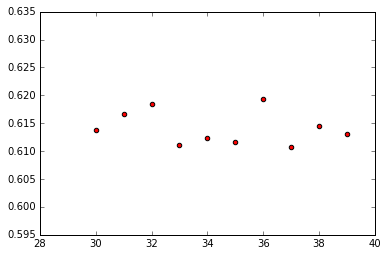

In [59]:
scores = cross_val_score(model, X,y,cv=5)
mean = scores.mean()
rng = np.arange(30,40,1)
scor2=[]
for s in rng:
    model = DecisionTreeClassifier(random_state=s)
    model.fit(X,y)
    scor2.append(cross_val_score(model,X,y,cv=5).mean())
import matplotlib.pylab as plt
%matplotlib inline
plt.scatter(rng, scor2, c='red')

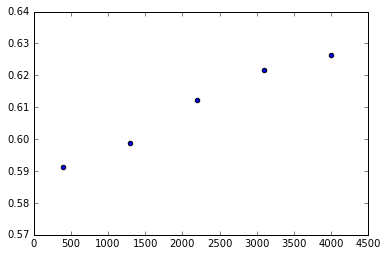

In [60]:
model = DecisionTreeClassifier(random_state=35)
from sklearn.model_selection import learning_curve
train_sizes1 = train_sizes
train_sizes1, train_scores, test_scores1 = learning_curve(model,X,y,cv=5)
mean_values1 = np.mean(test_scores, axis=1)

plt.scatter(train_sizes1,mean_values1)

<b>Question 2</b>

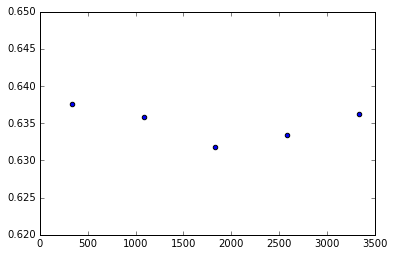

In [71]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(penalty='l2')
train_sizes3 = train_sizes
train_sizes3, train_scores3, test_scores3 = learning_curve(model,X,y)
mean_values3 = np.mean(test_scores3,axis=1)
plt.scatter(train_sizes3,mean_values3)

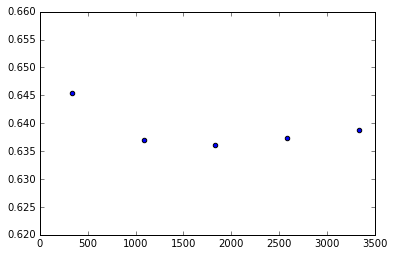

In [72]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(penalty='l1')
train_sizes4 = train_sizes
train_sizes4, train_scores4, test_scores4 = learning_curve(model,X,y)
mean_values4 = np.mean(test_scores4,axis = 1)
plt.scatter(train_sizes4,mean_values4)

<b>Question 3</b>

ValueError: x and y must be the same size

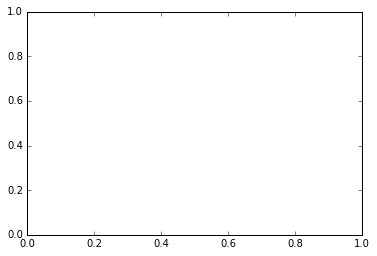

In [67]:
rng = np.arange(1, 40, 5)
from sklearn.tree import DecisionTreeClassifier
accuracy1 = []
model = DecisionTreeClassifier(random_state=35)
model.fit(X,y)
accuracy1.append(accuracy_score(y, model.predict(X)))
    
import matplotlib.pylab as plt
%matplotlib inline
plt.scatter(rng, accuracy1, c='blue')

ValueError: x and y must be the same size

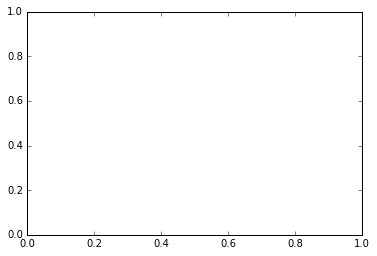

In [68]:
rng = np.arange(1, 40, 5)
from sklearn.tree import DecisionTreeClassifier
accuracy2 = []
model = DecisionTreeClassifier(min_samples_leaf=36)
model.fit(X,y)
accuracy2.append(accuracy_score(y, model.predict(X)))
    
import matplotlib.pylab as plt
%matplotlib inline
plt.scatter(rng, accuracy2, c='blue')

ValueError: x and y must be the same size

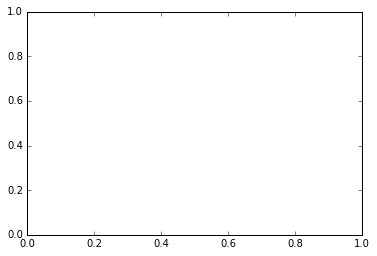

In [69]:
rng = np.arange(1, 40, 5)
log1 = []
model = LogisticRegression(penalty='l1')
model.fit(X,y)
log1.append(accuracy_score(y, model.predict(X)))
    
import matplotlib.pylab as plt
%matplotlib inline
plt.scatter(rng, log1, c='blue')

ValueError: x and y must be the same size

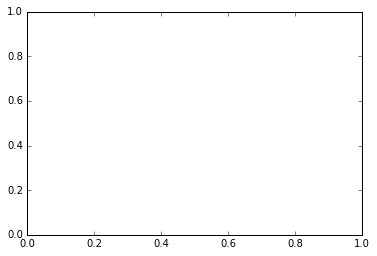

In [70]:
rng = np.arange(1,40,5)
log2 = []
model = LogisticRegression(penalty='l2')
model.fit(X,y)
log2.append(accuracy_score(y,model.predict(X)))
import matplotlib.pylab as plt
%matplotlib inline
plt.scatter(rng,log2,c='blue')